# Simple 2-layer Neural Network
## Handwritten Digit Recognition Using MNIST Dataset 

Aim: 
- Implement a basic and simple 2 layer neural network (1 hidden and 1 output layer) step-by-step and using it in a next step to recognize handwritten numbers. 
- Record and explain basic ideas of code fragments that are used.

## Step1 Rough structure of the code
* init(): define the number of nodes for the input, hidden and output layers
* train(): refine the weights using training samples
* query(): calculate the outputlayer of the neural network by feeding forward the signals from the inputlayer through the other layers. 

In [3]:
import numpy as np
from scipy import special 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class NeuralNetwork:
    def __init__():
        pass
    
    def train():
        pass
    
    def query():
        pass

## Step 2 Constructor for Initializing the Neural Network


1. create weight matrices w 
    * with weights wij:
    * wij is the link/weight from node i to node j in the next layer
2. initialize weights: 
    * initial weights with 0 would block input data
    * symmetric weights are bad because most problems aren't likely to have symmetric weights. In this case weights never will be assymetric
    * better with __rand__(weights)-0.5 values between [-0.5, +0.5] 
        * Big input weights distort the activation function
        * Big weights in general lead to saturation of activation function
        * The more weights are leading to a node the more signals are being summed up
    * the code below uses a __normal distribution__  
        * with mean = 0, 
        * reduces the range of the weights when the links are increasing
        * and the standard deviation $\sigma$ for the distribution, which refers to the number of incoming links to a node: $\frac{1}{sqrt(\text{number of incoming links})}$ <br/> corresponds to a sample taken from a normal distribution. It is a rule of thumb developed by mathematicians most of all for tanh() and a specific kind of distribution of input data
        
        **Normal Distribution** Probability Density function
        ![Normal Distribution](1440px-Normal_Distribution_PDF.svg.png)
        (Source:https://en.wikipedia.org/wiki/File:Normal_Distribution_PDF.svg)
<br/>

    * there are a lot of different initialization methods for the weights 
3. Using sigmoid as activation function

### 2.1 Implementation of init()

In [5]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        ''' specified number of nodes for the input, hidden and output layers'''
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        # initialize weight matrices with normal distribution
        self.weights_input_hidden = np.random.normal(
            0.0, pow(self.hidden_nodes, -0.5),
            (self.hidden_nodes, self.input_nodes))
        self.weights_hidden_output = np.random.normal(
            0.0, pow(self.output_nodes, -0.5),
            (self.output_nodes, self.hidden_nodes))

        # Sigmoid is the activation function
        self.activation_function = lambda x: sp.special.expit(x)

    def train():
        pass

    def query():
        pass


### 2.2 Weight matrix example for weights from input to hidden layer wij

input_node_1 | input_node_2 | input_node_3 | _
:---: | :---: | :---: | :---: |
w11 | w21 | w31 | **hidden_node_1**
w12 | w22 | w32 | **hidden_node_2**
w13 | w23 | w33 | **hidden_node_3**

Initialize Network and print weights:

In [6]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 2

nn = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,0.1)
        
print("max weight \n", max(nn.weights_input_hidden.flatten()))
print("min weight \n", min(nn.weights_input_hidden.flatten()))
print("weights_input_hidden\n", nn.weights_input_hidden)
print("weights_hidden_output\n",nn.weights_hidden_output)

max weight 
 1.0575668663149553
min weight 
 -1.338160539660269
weights_input_hidden
 [[-1.17538416 -0.43255884 -1.03332487]
 [ 0.39094382 -0.84710846 -1.33816054]
 [-0.74532723  1.05756687  0.63607258]]
weights_hidden_output
 [[ 0.48329431  0.40746753  0.07136047]
 [-0.12838448 -1.00073844  1.61964756]]


## Step 3 Query function of the Neural Network 
implement __query()__ function: calculate the outputlayer of the neural network by feeding forward 
        the signals from the inputlayer through the other layers
        

$layer_j = sigmoid(w_{ij}\cdot layer_i)$

### 3.1 Implementation of query():

In [7]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        self.input_layer = 0
        self.hidden_layer = 0
        self.output_layer = 0

        # initialize weight matrices with normal distribution
        self.weights_input_hidden = np.random.normal(
            0.0, pow(self.hidden_nodes, -0.5),
            (self.hidden_nodes, self.input_nodes))
        self.weights_hidden_output = np.random.normal(
            0.0, pow(self.output_nodes, -0.5),
            (self.output_nodes, self.hidden_nodes))
        
        # Sigmoid is the activation function
        self.activation_function = lambda x: special.expit(x)

    def train():
        pass

    def query(self, input_list):
        ''' calculate the outputlayer of the neural network by feeding forward 
        the signals from the inputlayer through the other layers. 
        
        Args:
            input_list: specialcified values from input_layer'''
        self.input_layer = np.array(input_list, ndmin=2).T

        self.hidden_layer = self.activation_function(
            np.dot(self.weights_input_hidden, self.input_layer))

        self.output_layer = self.activation_function(
            np.dot(self.weights_hidden_output, self.hidden_layer))

        return self.output_layer

    def printLayer(self):
        print("Input layer: \n", self.input_layer)
        print("Hidden layer h1-h3: \n", self.hidden_layer)
        print("Output layer: \n", self.output_layer)


### 3.2 Testing query()

In [8]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 2
learning_rate = 0.1

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
q = nn.query([1.0,-3.0, 4.3])

In [9]:
nn.printLayer()
print("weights_input_hidden\n", nn.weights_input_hidden)
print("weights_hidden_output\n",nn.weights_hidden_output)

Input layer: 
 [[ 1. ]
 [-3. ]
 [ 4.3]]
Hidden layer h1-h3: 
 [[0.31983464]
 [0.6828857 ]
 [0.64500554]]
Output layer: 
 [[0.76512588]
 [0.40315692]]
weights_input_hidden
 [[ 0.15799455 -0.88471793 -0.8294605 ]
 [ 0.17698808  0.26632438  0.32303495]
 [-0.9938919  -0.03801548  0.34348888]]
weights_hidden_output
 [[ 0.14179954  1.34999523  0.33138599]
 [ 0.40540461 -0.74116285 -0.02459094]]


## Step 4 Train function of the Neural Network
- Calculate the error by quering the neural network with a training sample and 
- compare the output with the label/target and finally backpropagate the error for all weights using the 
update rule:
    - $ \Delta{wij} =  \alpha \cdot \frac{\partial \text{C}}{\partial wij}$

    - $\frac{\partial \text{C}}{\partial wij} = \frac{\partial C}{\partial \text{x}} \cdot\frac{\partial \text{x}}{\partial \text{a}} \cdot \frac{\partial \text{a}}{\partial wij}$

    - if the activation function is the sigmoid function, then the update rule for the weights between two layers is:
    $=>  \Delta{wij} =  \alpha \cdot error \cdot sigmoid(1 - sigmoid(wij\cdot \text{current layer})) \cdot \text{previous layer}$

    - where:
        - C is the cost function, e.g MSE = |y-x|^2   , y is the label
        - x is the output of one training example after querying the network 
        - a is the activiation function
        - error = (x-y), respectively 
        - error = error * weights for the next layers
        
        
### 4.1 Implementation of train()

In [10]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        self.input_layer = 0
        self.hidden_layer = 0
        self.output_layer = 0

        # initialize weight matrices with normal distribution
        self.weights_input_hidden = np.random.normal(
            0.0, pow(self.hidden_nodes, -0.5),
            (self.hidden_nodes, self.input_nodes))
        self.weights_hidden_output = np.random.normal(
            0.0, pow(self.output_nodes, -0.5),
            (self.output_nodes, self.hidden_nodes))
        
        # Sigmoid is the activation function
        self.activation_function = lambda x: special.expit(x)
    
    def train(self, sample_list, label_list):
        ''' Calculate the error by quering the neural network with a
            training sample and compare the output with the label/target
            and finally backpropagate the error

        Args:
            sample_list: a list of training samples
            label_list: a list of labels for the corresponding training examples
        '''
        self.query(sample_list)

        output_layer_errors = np.array(
            label_list, ndmin=2).T - self.output_layer

        hidden_layer_errors = np.dot(self.weights_hidden_output.T,
                                     output_layer_errors)

        # update rule hidden to output
        self.weights_hidden_output += self.learning_rate * np.dot(
            (output_layer_errors * self.output_layer * (1.0 - self.output_layer)),
            np.transpose(self.hidden_layer))

        # update rule  hidden to input
        self.weights_input_hidden += self.learning_rate * np.dot(
            (hidden_layer_errors * self.hidden_layer * (1.0 - self.hidden_layer)),
            np.transpose(self.input_layer))


    def query(self, input_list):
        self.input_layer = np.array(input_list, ndmin=2).T

        self.hidden_layer = self.activation_function(
            np.dot(self.weights_input_hidden, self.input_layer))

        self.output_layer = self.activation_function(
            np.dot(self.weights_hidden_output, self.hidden_layer))

        return self.output_layer


## Step 5 Using the MNIST Dataset of handwritten numbers to train a network
The training- and testdataset consits of 
- column 0: data label for the numbers 0-9
- columns 1-785: pixel values 0..255 for the 28x28 pictures of the numbers:
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0
...



For testing ideas in the code use a smaller dataset with less samples

### 5.1 Create The Neural Network

- Apparently, there is no clear method to determine the number of nodes in the hidden layer, a reasonable number can be determined by experiments and measurements.

In [11]:
# Small Dataset
# MNIST_TRAIN_DATASET = 
# MNIST_TEST_DATASET = 

# Complete Dataset
MNIST_TRAIN_DATASET = "mnistDataset/mnist_train.csv"
MNIST_TEST_DATASET = "mnistDataset/mnist_test.csv" 

# 28 by 28 pixels for the Handwritten Digits
input_nodes = 784

hidden_nodes = 196

# Numbers 0-9
output_nodes = 10

learning_rate = 0.1

neuralNetwork = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

### 5.2 Work with the MNIST Dataset
#### Load the Data from the MNIST Dataset into a List
- caution readlines() reads the entire file into memory instead of processing every entry sequentially but in this case it should be fine

In [12]:

mnist_training_dataset = open(MNIST_TRAIN_DATASET, 'r')
mnist_training_samples = mnist_training_dataset.readlines()
mnist_training_dataset.close()

#### Visualize a Number from the Dataset

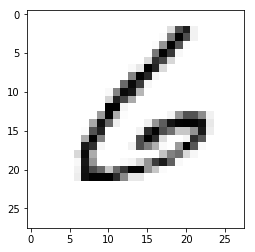

In [16]:
training_sample_reshaped = np.asfarray(mnist_training_samples[59998].split(',')[1:]).reshape((28,28))
plt.imshow(training_sample_reshaped, cmap= 'Greys')

#### Prepare the MNIST Trainingdata and Train the Neural Network
- Neural networks work better if the input and output values are within the optimal range of the activation function. With the sigmoid function this would be between 0.01 to 1, therefore the input values 0..255 are scaled down to this range. The output values should be between 0.01-0.99 because 1 is never reached by the sigmoid function. Otherwise this leads to saturation of the network. To avoid saturation of the network:
    - avoid input values of 0 otherwise update of the weights will be eliminated (see Step 4 update rule: previous layer respectivly input layer is zero so that $\Delta w_{ij}$ will be zero )
    - allow input values of 1 but dont allow output values of 1 because 1 will never be reached by the sigmoid function



In [117]:
MAX_VALUE = 0.99
MIN_VALUE = 0.01
SCALING_FACTOR = 255.0
EPOCHS = 5
LABEL_COLUMN = 0

for epoch in range(EPOCHS):
    for mnist_training_sample in mnist_training_samples:
        training_sample_scaled = (np.asfarray(
            mnist_training_sample.split(',')[1:]) / SCALING_FACTOR * MAX_VALUE) + MIN_VALUE
        labels = np.zeros(output_nodes) + MIN_VALUE
        labels[int(mnist_training_sample[LABEL_COLUMN])] = MAX_VALUE
        neuralNetwork.train(training_sample_scaled, labels)

#### Test the Trained Network and Evaluate Performance

In [118]:
mnist_test_dataset = open(MNIST_TEST_DATASET, 'r')
mnist_test_samples = mnist_test_dataset.readlines()
mnist_test_dataset.close()

PredictionScore = []

for mnist_test_sample in mnist_test_samples:
    correct_label = int(mnist_test_sample[LABEL_COLUMN])
    test_sample_scaled = (np.asfarray(mnist_test_sample.split(',')[1:]) / SCALING_FACTOR *
              MAX_VALUE) + MIN_VALUE
    predicted_label = np.argmax(neuralNetwork.query(test_sample_scaled))
    if (predicted_label == correct_label):
        score.append(1)
    else:
        score.append(0)

score = np.array(score)
print("performance = ", score.sum() / score.size)

performance =  0.9732


compare performance with : http://yann.lecun.com/exdb/mnist/

## Step 6 Optimizations
